#### this is the exploratory data analysis of All state Claim 
- the graph will be done in Seaborn package

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [70]:
import os

os.chdir(r"J:\Tutorial\Kaggle Competitions\AllState")
train = pd.read_csv("train.csv", nrows=60000)
test  = pd.read_csv('test.csv', nrows=60000)
#train = pd.read_csv("train.csv")
#test  = pd.read_csv('test.csv')
combined = [train, test]
combined = pd.concat(combined)
print(combined.shape)

# find the skewness of the dataset
print(combined.skew())

(120000, 132)
cont1     0.515394
cont10    0.354148
cont11    0.284591
cont12    0.294801
cont13    0.373548
cont14    0.247789
cont2    -0.310958
cont3    -0.002756
cont4     0.419745
cont5     0.676800
cont6     0.455183
cont7     0.832015
cont8     0.680459
cont9     1.066590
id        0.329354
loss      4.232704
dtype: float64


(120000, 14)
Counter({False: 60000, True: 60000})
Counter({False: 60000})


C:\Users\ting\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


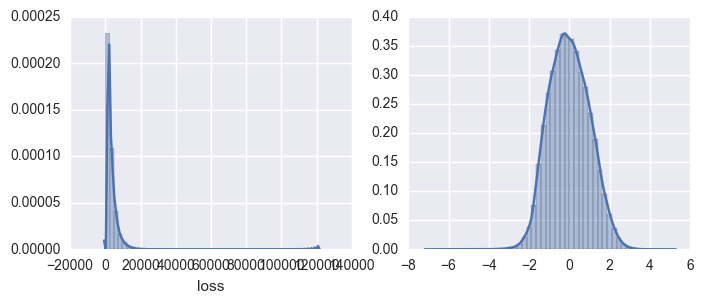

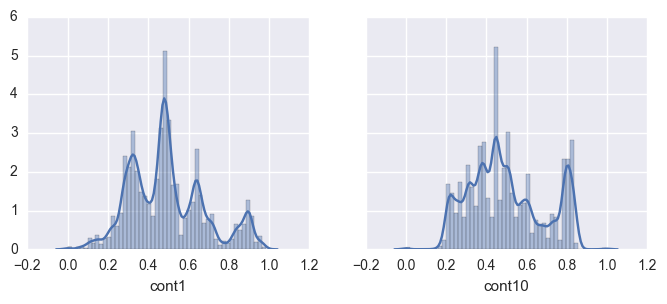

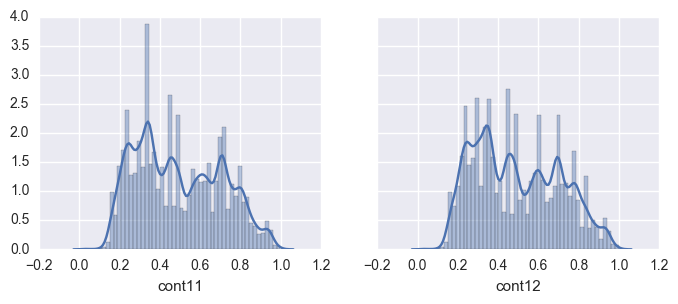

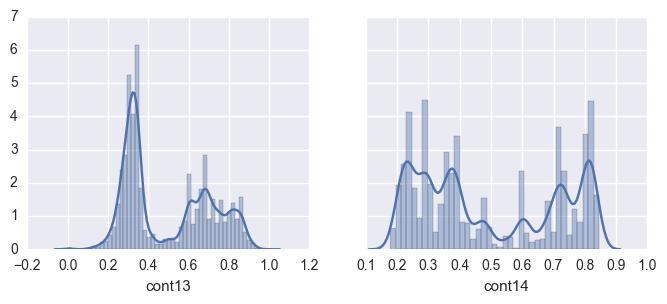

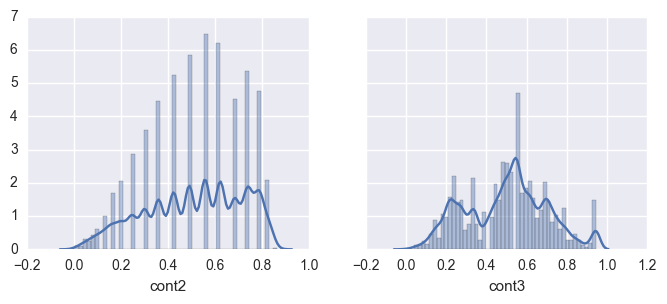

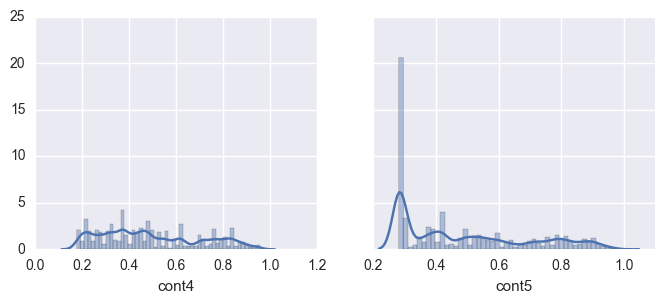

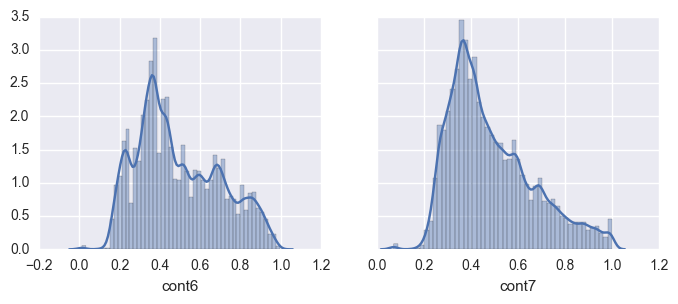

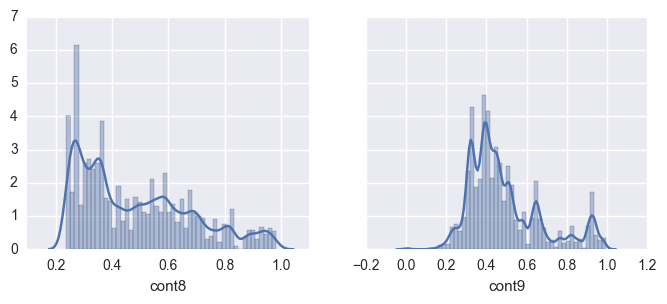

In [71]:
# the reason I re-start here is because I don't want to load large amount of
# data each time. It will speed up everything
import seaborn as sns
from sklearn import preprocessing
import math
from collections import Counter

#sns.set(color_codes=True)
#sns.set(style="white", palette="muted")

Xtrain = train.copy()
Xtest  = test.copy()
Xcombined = combined.copy()

ids = Xcombined['id']
loss = Xcombined['loss']
Xcombined.drop(['id', 'loss'], 1, inplace=True)
all_nums = Xcombined.select_dtypes(exclude=[object])
print(all_nums.shape)
#all_nums = preprocessing.scale(all_nums)
#print(all_nums.head())

# target distribution
print(Counter(np.isnan(loss)))

# as test dataset doesn't have loss, so we need to separate them or mask them
# loss.fillna(0, inplace=True)
loss = loss[:Xtrain.shape[0],]
print(Counter(np.isnan(loss)))

fig, ax = plt.subplots(1, 2, sharey=False, figsize=(8,3))
sns.distplot(loss, ax=ax[0])

# the loss target is log-normal distributed, we will transform it to normal
loss = np.log(loss.values)
loss = preprocessing.scale(loss)
sns.distplot(loss, ax=ax[1])
plt.show()

# for all numeric distribution
nrows = 7
ncols = 2
col_names = all_nums.columns

for i in range(nrows):
    fig, ax = plt.subplots(nrows=1, ncols=ncols, sharey=True, figsize=(8,3))
    for j in range(ncols):
        #print(col_names[i*ncols+j])
        #print(all_nums[col_names[i*ncols+j]][2:5])
        sns.distplot(all_nums[col_names[i*ncols+j]], ax=ax[j])
        
#for col in all_nums.columns:
    #length = max(all_nums[col]) - min(all_nums[col])
    #print(length)
    #sns.distplot(all_nums[col], bins=np.arange(0,max(all_nums[col])))
    #plt.hist(all_nums[col])
    #sns.distplot(all_nums[col])
    #plt.show()

# check to see the relationship among the numeric part of the data
#sns.pairplot(all_nums)
plt.show()
#cols = all_nums.columns.values
# sns.distplot(all_nums[cols[0]] * math.sin(all_nums[cols[0]]))
# sns.distplot(math.asin(all_nums[cols[0]]))
#sns.distplot(all_nums[cols[0]])
#plt.show()

#### correlation coefficients
- find out the relationship among them

In [72]:
all_nums.corr()

,cont1,cont10,cont11,cont12,cont13,cont14,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9
cont1,1.000000,0.807414,0.595899,0.614300,0.531632,0.058208,-0.081171,-0.443562,0.368748,-0.021837,0.756907,0.367440,0.362200,0.931133
cont10,0.807414,1.000000,0.704953,0.716090,0.705930,0.039299,0.067336,-0.323602,0.282785,-0.064059,0.883883,0.494344,0.337194,0.785797
cont11,0.595899,0.704953,1.000000,0.994328,0.467120,0.047191,0.121332,0.023427,0.123409,-0.146550,0.775422,0.746971,0.306515,0.607927
cont12,0.614300,0.716090,0.994328,1.000000,0.479635,0.049933,0.110504,0.003700,0.133014,-0.143390,0.786951,0.742599,0.319707,0.626764
cont13,0.531632,0.705930,0.467120,0.479635,1.000000,0.046503,0.024956,-0.418384,0.178492,-0.083230,0.813410,0.286405,0.474819,0.639186
cont14,0.058208,0.039299,0.047191,0.049933,0.046503,1.000000,-0.045224,-0.038418,0.016326,-0.020778,0.041487,0.021824,0.043453,0.075424
cont2,-0.081171,0.067336,0.121332,0.110504,0.024956,-0.045224,1.000000,0.456047,0.040821,0.186962,0.020685,0.051304,0.140727,-0.027812
cont3,-0.443562,-0.323602,0.023427,0.003700,-0.418384,-0.038418,0.456047,1.000000,-0.340428,0.090150,-0.348668,0.096356,-0.179641,-0.415233
cont4,0.368748,0.282785,0.123409,0.133014,0.178492,0.016326,0.040821,-0.340428,1.000000,0.164183,0.221494,-0.114440,0.530006,0.331589
cont5,-0.021837,-0.064059,-0.146550,-0.143390,-0.083230,-0.020778,0.186962,0.090150,0.164183,1.000000,-0.148335,-0.246845,0.009813,-0.083730


It seems that all data distributions for numeric variables are not normal one. Here I try to combine some of the variables numerically to see if the final combined new variables are normal distribution

C:\Users\ting\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


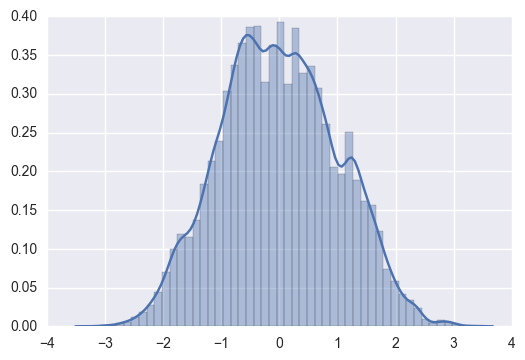

In [73]:
cont1_2_5 = all_nums['cont1']+all_nums['cont2']+all_nums['cont5']
cont1_2_5 = preprocessing.scale(cont1_2_5)
sns.distplot(cont1_2_5)

plt.show()

C:\Users\ting\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


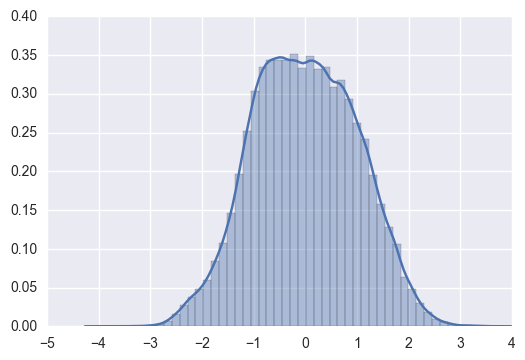

In [74]:
cont3_13_14 = all_nums['cont3']+all_nums['cont14']+all_nums['cont13']
cont3_13_14 = preprocessing.scale(cont3_13_14)
sns.distplot(cont3_13_14)

plt.show()

C:\Users\ting\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


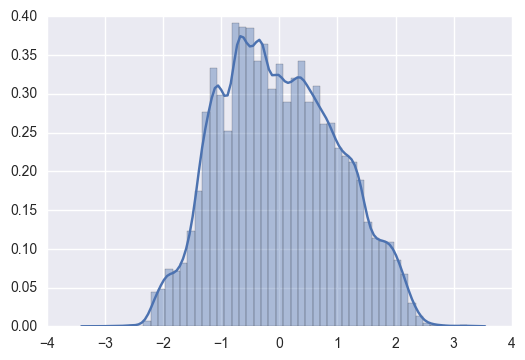

In [75]:
cont4_7_10 = all_nums['cont10']+all_nums['cont4']+all_nums['cont7']
cont4_7_10 = preprocessing.scale(cont4_7_10)
sns.distplot(cont4_7_10)

plt.show()

C:\Users\ting\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


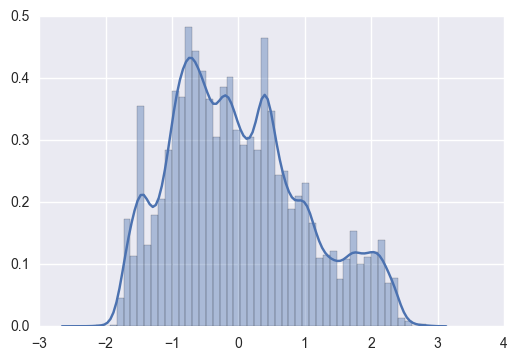

In [76]:
cont6_8_11 = all_nums['cont6']+all_nums['cont8']+all_nums['cont11']
cont6_8_11 = preprocessing.scale(cont6_8_11)
sns.distplot(cont6_8_11)

plt.show()

C:\Users\ting\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


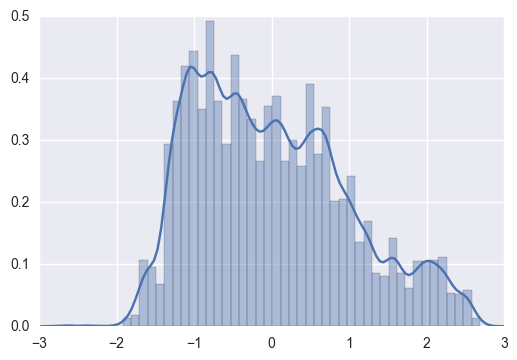

In [77]:
cont9_12 = all_nums['cont12']+all_nums['cont9']#+all_nums['cont6']
cont9_12 = preprocessing.scale(cont9_12)
sns.distplot(cont9_12)

plt.show()

C:\Users\ting\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


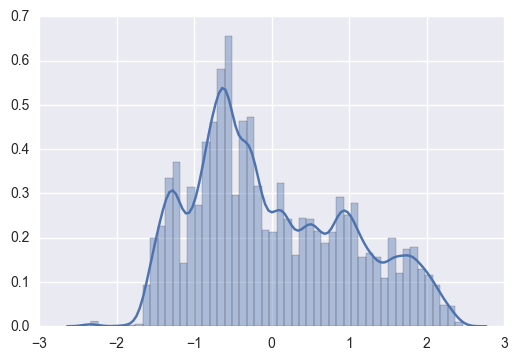

In [91]:
cont8 = all_nums['cont6']
cont8 = preprocessing.scale(cont8)
sns.distplot(cont8)

plt.show()

In [85]:
for column in list(train.select_dtypes(include=['object']).columns):
    #print(train[column].head())
    if train[column].nunique() != test[column].nunique():
        print("I am in at column:", column)
        set_train = set(train[column].unique())
        set_test = set(test[column].unique())
        remove_train = set_train - set_test
        remove_test = set_test - set_train

I am in at column: cat89
I am in at column: cat90
I am in at column: cat102
I am in at column: cat103
I am in at column: cat104
I am in at column: cat105
I am in at column: cat107
I am in at column: cat109
I am in at column: cat110
I am in at column: cat111
I am in at column: cat113
I am in at column: cat115
I am in at column: cat116


In [ ]:
for column in list(train.select_dtypes(include=['object']).columns):
    if train[column].nunique() != test[column].nunique():
        set_train = set(train[column].unique())
        set_test = set(test[column].unique())
        remove_train = set_train - set_test
        remove_test = set_test - set_train

        remove = remove_train.union(remove_test)
        def filter_cat(x):
            if x in remove:
                return np.nan
            return x

        joined[column] = joined[column].apply(lambda x: filter_cat(x), 1)
            
    joined[column] = pd.factorize(joined[column].values, sort=True)[0]

train = joined[joined['loss'].notnull()]
test = joined[joined['loss'].isnull()]

shift = 200
y = np.log(train['loss'] + shift)
ids = test['id']
X = train.drop(['loss', 'id'], 1)
X_test = test.drop(['loss', 'id'], 1)

RANDOM_STATE = 2016
params = {
    'min_child_weight': 1,
    'eta': 0.01,
    'colsample_bytree': 0.5,
    'max_depth': 12,
    'subsample': 0.8,
    'alpha': 1,
    'gamma': 1,
    'silent': 1,
    'verbose_eval': True,
    'seed': RANDOM_STATE
}

xgtrain = xgb.DMatrix(X, label=y)
xgtest = xgb.DMatrix(X_test)

model = xgb.train(params, xgtrain, int(2012 / 0.9), feval=evalerror)

prediction = np.exp(model.predict(xgtest)) - shift

submission = pd.DataFrame()
submission['loss'] = prediction
submission['id'] = ids
submission.to_csv('sub_v.csv', index=False)

In [1]:
import xgboost